## What’s the value or how good it is for the robot to be in each of the gridworld states/squares?

![Getting Started](grid.PNG)

In [1]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
#%matplotlibBarron@
import random

In [2]:
gamma = 1 # discounting rate
reward_size = 4
grid_size = 4
termination_states = [[0, 0], [grid_size-1]]
actions = [[-1, 0], [1, 0], [0, 1], [0, -1]]
num_iterations = 100

In [3]:
def action_reward_function(initial_position, action):
    if initial_position in termination_states:
        return initial_position, 0

    reward = reward_size
    final_position = np.array(initial_position) + np.array(action)
    if -1 in final_position or 4 in final_position:
        final_position = initial_position
    return final_position, reward

In [4]:
value_map = np.zeros((grid_size, grid_size))
states = [[i, j] for i in range(grid_size) for j in range(grid_size)]

In [5]:
# values of the value function at step 0
value_map

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

### A way to solve the aforementioned state-value function is to use policy iteration, an algorithm included in a field of mathematics called dynamic programming.

![Getting Started](algo.PNG)

![Getting Started](math.PNG)

In [6]:
deltas = []
for it in range(num_iterations):
    copy_value_map = np.copy(value_map)
    delta_state = []
    for state in states:
        weighted_rewards = 0
        for action in actions:
            final_position, reward = action_reward_function(state, action)
            weighted_rewards += (1/len(actions))*(reward+(gamma*value_map[final_position[0], final_position[1]]))
        delta_state.append(np.abs(copy_value_map[state[0], state[1]]-weighted_rewards))
        copy_value_map[state[0], state[1]] = weighted_rewards
    deltas.append(delta_state)
    value_map = copy_value_map
    for it in [0,1,2,9,99, num_iterations-1]:
        print("Iteration {}".format(it+1))
        print(value_map)
        print("")

Iteration 1
[[0. 4. 4. 4.]
 [4. 4. 4. 4.]
 [4. 4. 4. 4.]
 [4. 4. 4. 4.]]

Iteration 2
[[0. 4. 4. 4.]
 [4. 4. 4. 4.]
 [4. 4. 4. 4.]
 [4. 4. 4. 4.]]

Iteration 3
[[0. 4. 4. 4.]
 [4. 4. 4. 4.]
 [4. 4. 4. 4.]
 [4. 4. 4. 4.]]

Iteration 10
[[0. 4. 4. 4.]
 [4. 4. 4. 4.]
 [4. 4. 4. 4.]
 [4. 4. 4. 4.]]

Iteration 100
[[0. 4. 4. 4.]
 [4. 4. 4. 4.]
 [4. 4. 4. 4.]
 [4. 4. 4. 4.]]

Iteration 100
[[0. 4. 4. 4.]
 [4. 4. 4. 4.]
 [4. 4. 4. 4.]
 [4. 4. 4. 4.]]

Iteration 1
[[0. 7. 8. 8.]
 [7. 8. 8. 8.]
 [8. 8. 8. 8.]
 [8. 8. 8. 8.]]

Iteration 2
[[0. 7. 8. 8.]
 [7. 8. 8. 8.]
 [8. 8. 8. 8.]
 [8. 8. 8. 8.]]

Iteration 3
[[0. 7. 8. 8.]
 [7. 8. 8. 8.]
 [8. 8. 8. 8.]
 [8. 8. 8. 8.]]

Iteration 10
[[0. 7. 8. 8.]
 [7. 8. 8. 8.]
 [8. 8. 8. 8.]
 [8. 8. 8. 8.]]

Iteration 100
[[0. 7. 8. 8.]
 [7. 8. 8. 8.]
 [8. 8. 8. 8.]
 [8. 8. 8. 8.]]

Iteration 100
[[0. 7. 8. 8.]
 [7. 8. 8. 8.]
 [8. 8. 8. 8.]
 [8. 8. 8. 8.]]

Iteration 1
[[ 0.    9.75 11.75 12.  ]
 [ 9.75 11.5  12.   12.  ]
 [11.75 12.   12.   12.  ]
 [12.   1

![Getting Started](optimum.PNG)

- The left column is the sequence of approximations of state value function for the random policy
- The right column is the sequence of greedy policies corresponding to the values function estimates

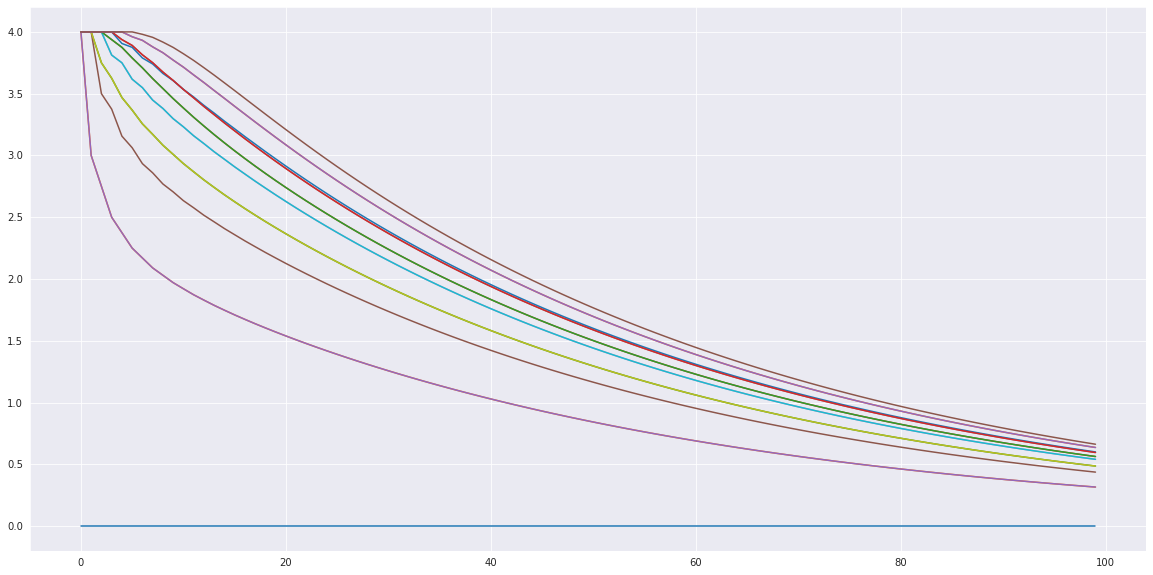

In [8]:
plt.figure(figsize=(20, 10))
plt.plot(deltas)

 Notice that we can repeat this process over and over in which we “sweep” and update the state-value function for all the states. These values can get iteratively updated until reaching convergence. In fact in the iterative policy evaluation algorithm, you can see we calculate some delta that reflect how much the value of a state changes respect the previous value. These deltas decay over the iterations and are supposed to reach 0 at the infinity.